In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1500

In [3]:
df = pd.read_excel('C:/Users/Anastasiya.Mittseva/PycharmProjects/ProjectPredictSolidity/prepared_data.xlsx')

In [4]:
df.head()

,Сталь,С,Mn,Si,S,P,Cr,Ni,Cu,Mo,V,Nb,Ti,Al,N,B,Сэкв,Тнагрева,"время выдержки, мин",параметр закалки,Ас1,Ас3,V800-500 °C/c,%Ф,%П,%Б,%М,%А остаточный,HV,HRC
0,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850,10,810.626512,735.0,795.0,0.11,NaN,NaN,NaN,NaN,NaN,180.0,NaN
1,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850,10,810.626512,735.0,795.0,0.31,NaN,NaN,NaN,NaN,NaN,180.0,NaN
2,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850,10,810.626512,735.0,795.0,1.00,NaN,NaN,NaN,NaN,NaN,180.0,NaN
3,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850,10,810.626512,735.0,795.0,3.40,NaN,NaN,NaN,NaN,NaN,195.0,NaN
4,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850,10,810.626512,735.0,795.0,7.00,NaN,NaN,NaN,NaN,NaN,200.0,NaN


## Подготовка данных

In [5]:
def convertHRCtoHV(x):
    y = 0.0001076546813696400 * x ** 4 - 0.01404920211793480 * x ** 3 + 0.7989548243359580 * x ** 2 - 13.82475417563670 * x + 289.8692821768870
    return y

In [6]:
def repl(x):
    if np.isnan(x):
        return round(convertHRCtoHV(df['HRC'].loc[x.index]),2)
    else:
        return x

In [7]:
df['HRC'] = df['HRC'].map(convertHRCtoHV)

In [8]:
df['HV'] = df['HV'].combine_first(df['HRC'])

In [9]:
df = df.drop('HRC',1)

In [10]:
df = df.fillna(0)

In [11]:
df = df[~(df['HV'] == 0.0)]

In [12]:
df = df.drop(df[df['%А остаточный'] != 0].index)

In [13]:
df = df.drop('%А остаточный',1)

In [14]:
df = df[~(df['V800-500 °C/c']== 0.0)]

In [15]:
# df = df.drop(df[(df['%Ф']+df['%П']+df['%Б']+df['%М']) != 100].index)

In [16]:
df = df.reset_index()

In [17]:
df = df.drop('index',1)

In [18]:
df.head()

,Сталь,С,Mn,Si,S,P,Cr,Ni,Cu,Mo,V,Nb,Ti,Al,N,B,Сэкв,Тнагрева,"время выдержки, мин",параметр закалки,Ас1,Ас3,V800-500 °C/c,%Ф,%П,%Б,%М,HV
0,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850,10,810.626512,735.0,795.0,0.11,0.0,0.0,0.0,0.0,180.0
1,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850,10,810.626512,735.0,795.0,0.31,0.0,0.0,0.0,0.0,180.0
2,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850,10,810.626512,735.0,795.0,1.00,0.0,0.0,0.0,0.0,180.0
3,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850,10,810.626512,735.0,795.0,3.40,0.0,0.0,0.0,0.0,195.0
4,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850,10,810.626512,735.0,795.0,7.00,0.0,0.0,0.0,0.0,200.0


## Графики 

In [19]:
import  seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

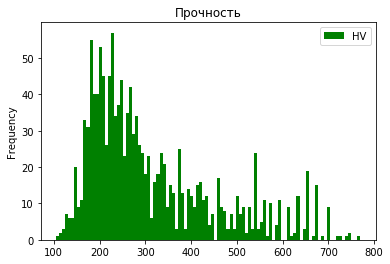

In [20]:
df.plot(y='HV', kind='hist', color='green', title='Прочность', bins=100)
plt.show()

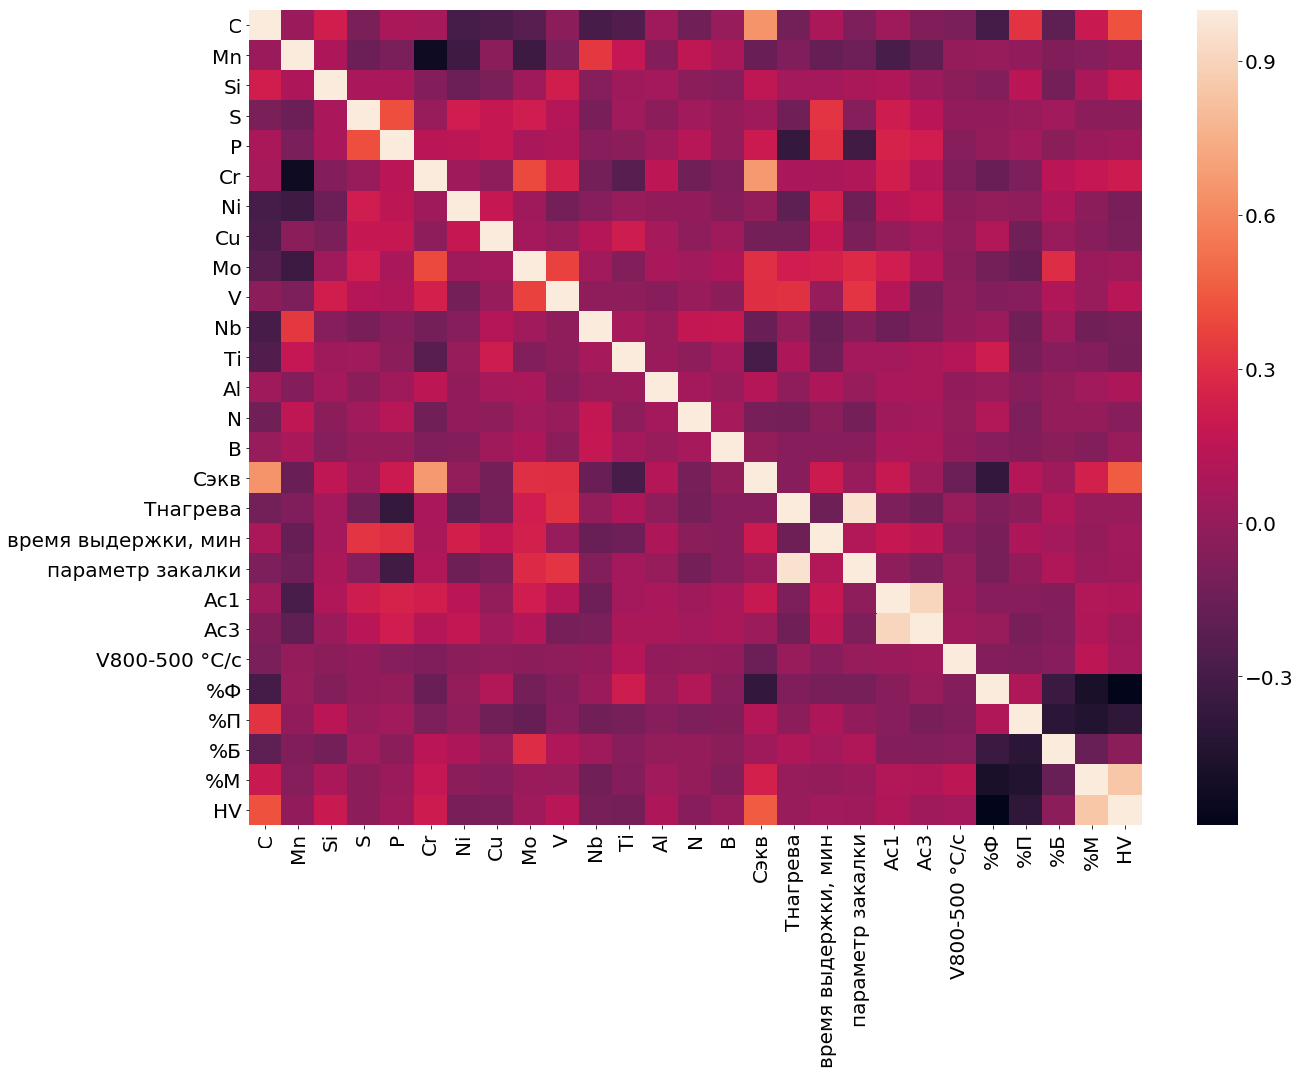

In [21]:
plt.rcParams.update({'font.size': 20})
plt.subplots(figsize=(20,15))

corr = df.corr()
corr_hm = sns.heatmap(corr)
fig = corr_hm.get_figure()

In [22]:
df_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti',
       'Al', 'N', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']

In [23]:
ls_targets = ['HV']

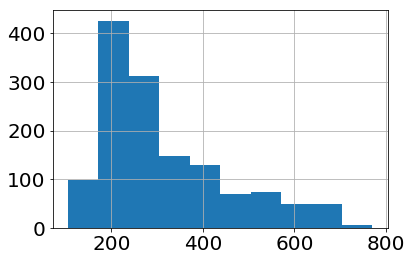

In [24]:
df['HV'].hist()

In [25]:
df[df_col+ ls_targets].corr()

,С,Mn,Si,S,P,Cr,Ni,Cu,Mo,V,Nb,Ti,Al,N,B,Сэкв,параметр закалки,V800-500 °C/c,HV
С,1.000000,0.022486,0.226186,-0.091789,0.074458,0.066421,-0.293022,-0.271731,-0.218786,-0.026575,-0.291048,-0.258283,0.033419,-0.131445,0.008125,0.650007,-0.085640,-0.098997,0.425368
Mn,0.022486,1.000000,0.092524,-0.149970,-0.099112,-0.532124,-0.325844,-0.040339,-0.337657,-0.081249,0.340137,0.177612,-0.061887,0.159054,0.083250,-0.161628,-0.140595,0.001943,-0.010261
Si,0.226186,0.092524,1.000000,0.070160,0.069809,-0.058847,-0.152401,-0.087445,0.036406,0.223461,-0.051293,0.039168,0.054298,-0.034248,-0.052124,0.155483,0.074988,-0.026737,0.195618
S,-0.091789,-0.149970,0.070160,1.000000,0.415353,0.013051,0.220481,0.182515,0.219449,0.121545,-0.104292,0.049143,-0.033793,0.043601,0.000728,0.035054,-0.053775,-0.009946,-0.034066
P,0.074458,-0.099112,0.069809,0.415353,1.000000,0.138013,0.153027,0.184786,0.074141,0.095546,-0.048596,-0.032777,0.031337,0.127690,0.003482,0.201159,-0.312487,-0.052985,0.034932
Cr,0.066421,-0.532124,-0.058847,0.013051,0.138013,1.000000,0.042485,-0.022534,0.393271,0.239077,-0.117373,-0.221517,0.149413,-0.127546,-0.076169,0.665919,0.100892,-0.075095,0.209738
Ni,-0.293022,-0.325844,-0.152401,0.220481,0.153027,0.042485,1.000000,0.180683,0.035467,-0.117940,-0.050288,0.006475,-0.012271,-0.007724,-0.057017,-0.001815,-0.145081,-0.034893,-0.100336
Cu,-0.271731,-0.040339,-0.087445,0.182515,0.184786,-0.022534,0.180683,1.000000,0.058182,0.008497,0.111958,0.216905,0.063091,-0.020856,0.030745,-0.115784,-0.088841,-0.018248,-0.099034
Mo,-0.218786,-0.337657,0.036406,0.219449,0.074141,0.393271,0.035467,0.058182,1.000000,0.377756,0.047911,-0.067611,0.072511,0.047594,0.089622,0.308417,0.283925,-0.035070,0.041264
V,-0.026575,-0.081249,0.223461,0.121545,0.095546,0.239077,-0.117940,0.008497,0.377756,1.000000,-0.017463,-0.023698,-0.043936,0.015953,-0.035512,0.300880,0.324373,-0.016673,0.132291


In [27]:
df[df_col].corrwith(df['HV'])

С                   0.425368
Mn                 -0.010261
Si                  0.195618
S                  -0.034066
P                   0.034932
Cr                  0.209738
Ni                 -0.100336
Cu                 -0.099034
Mo                  0.041264
V                   0.132291
Nb                 -0.108961
Ti                 -0.114314
Al                  0.087807
N                  -0.047175
B                   0.013651
Сэкв                0.454267
параметр закалки    0.040503
V800-500 °C/c       0.050479
dtype: float64

## GRNN 

In [289]:
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn import model_selection, preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, matthews_corrcoef, median_absolute_error
from neupy import algorithms, estimators, environment
from scipy.stats import pearsonr

ls_train_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti', 'Al', 'N', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']
targets = ['HV']

x_input = df[ls_train_col]
y_input = df[targets]

x, x_valid, y, y_valid = train_test_split(preprocessing.minmax_scale(x_input, feature_range = (0 , 1)),preprocessing.minmax_scale(y_input, feature_range = (0 , 1)),test_size=0.3)

def print_and_return_score(x, y, est):
    y_pred = est.predict(x)
#     mae = mean_absolute_error(y, y_pred)
#     mse = mean_squared_error(y, y_pred)
#     r2 = r2_score(y, y_pred)
    corr = pearsonr(y, y_pred)   
    
#     print('R^2: ', round(r2, 2))
#     print('MAE: ', round(mae, 2))
#     print('MSE: ', round(mse, 2))
    print('Corr: ', round(corr[0][0], 2))
    
    return corr[0][0]

In [290]:
x_train, x_test, y_train, y_test = train_test_split(preprocessing.minmax_scale(x, feature_range = (0 , 1)),preprocessing.minmax_scale(y, feature_range = (0 , 1)),test_size=0.3)

In [292]:
best_corr_test = 0
best_std = 0
i = 0
while i < 3:
    i = i + 0.0001
    nw = algorithms.GRNN(std=i, verbose=False)
    nw.train(x_train, y_train)
    corr_test = print_and_return_score(x_test, y_test, nw)
    if corr_test > best_corr_test:
        best_corr_test = corr_test 
        best_std = i

Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan
Corr:  nan

Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr

Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr

Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr

Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr

Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr

Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr

Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr

Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr:  0.43
Corr

Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr

Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr:  0.42
Corr

KeyboardInterrupt: 

In [281]:
print(best_corr_test, best_std)

0.7286090522713624 0.002


In [305]:
nw = algorithms.GRNN(std=0.0025, verbose=False)

In [306]:
nw.train(x_train, y_train)

In [307]:
 corr_test = print_and_return_score(x_test, y_test, nw)

Corr:  nan


In [308]:
corr_valid = print_and_return_score(x_valid, y_valid, nw)

Corr:  nan


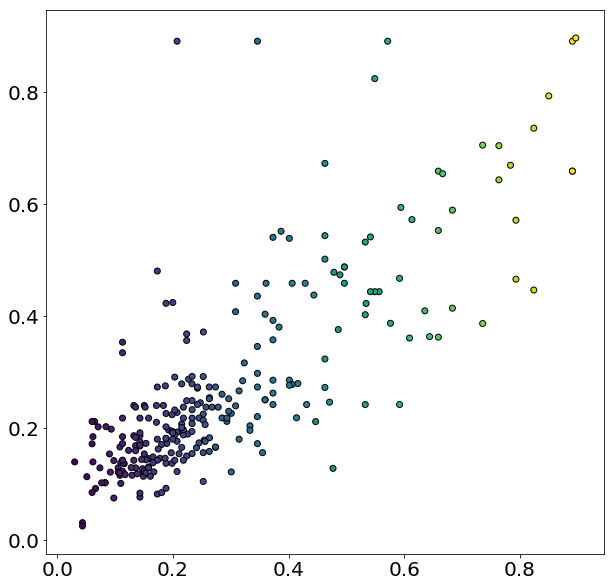

In [309]:
y_predict_test = nw.predict(x_test)
plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict_test, marker='o', c=y_test, edgecolors='black', cmap='viridis')
plt.show()

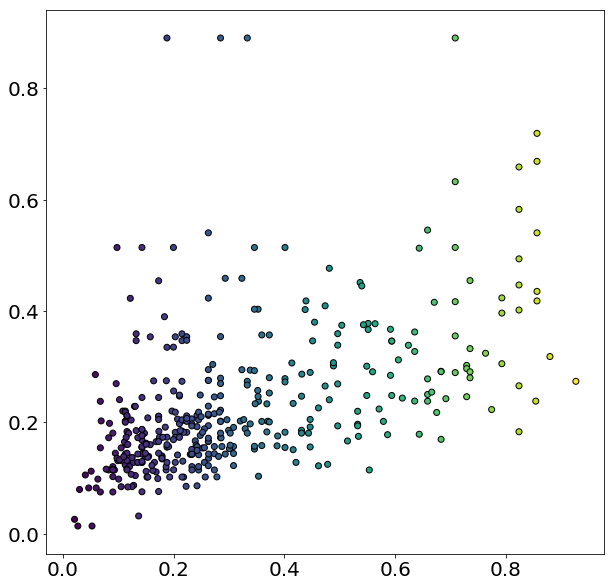

In [310]:
y_predict_valid= nw.predict(x_valid)
plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict_valid, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()

In [189]:
y_predict_test

array([[0.56876392],
       [0.17027072],
       [0.13540564],
       [0.20191549],
       [0.18374673],
       [0.20322013],
       [0.16600765],
       [0.11199951],
       [0.32342037],
       [0.17891975],
       [0.31709291],
       [0.2357471 ],
       [0.33555294],
       [0.32672401],
       [0.16304158],
       [0.20269459],
       [0.50570288],
       [0.3169754 ],
       [0.2467936 ],
       [0.21184375],
       [0.36199846],
       [0.2369964 ],
       [0.34332911],
       [0.30049627],
       [0.26509488],
       [0.21447895],
       [0.20264757],
       [0.42923476],
       [0.1938247 ],
       [0.22890314],
       [0.62402715],
       [0.41087168],
       [0.36479849],
       [0.301075  ],
       [0.13460618],
       [0.05263158],
       [0.12932331],
       [0.25464538],
       [0.23313617],
       [0.19111863],
       [0.52286542],
       [0.14939088],
       [0.59019178],
       [0.00719752],
       [0.20397907],
       [0.31929669],
       [0.23547869],
       [0.281